# Match Analysis

In [766]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tkinter as tk
from tkinter import simpledialog
import matplotlib as mpl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [767]:
import json
from pandas.io.json import json_normalize
import seaborn as sns
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
from matplotlib.patches import Arc
from sklearn import metrics

from functools import reduce

In [768]:
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)

In [769]:
folder_path = '~/Documents/GAA Analytics/2024/'

In [770]:
df = pd.read_excel(folder_path + "Football_Championship_Combined_xPoint.xlsx")

In [771]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv
1665,588,161,2024-06-16,All Ireland Group R3,Meath,Monaghan,2nd,70,point,Score,James Conlon,13,forward,right,n,39.06,38.304598,51.650946,106.695402,36.349054,1,1,0,3,0,11.295588,0,0.490695
1666,589,163,2024-06-16,All Ireland Group R3,Meath,Monaghan,2nd,70,point,Score,Eoghan Frayne,15,forward,right,n,47.85,45.109951,59.974441,99.890049,28.025559,1,1,0,3,0,19.500191,0,0.318251
1667,590,160,2024-06-16,All Ireland Group R3,Monaghan,Meath,2nd,70,wide,Miss,Conor McCarthy,7,back,left,y,15.40,138.639939,58.026389,138.639939,58.026389,0,1,1,1,1,-65.608780,0,0.715099
1668,591,162,2024-06-16,All Ireland Group R3,Monaghan,Meath,2nd,70,post,Miss,Micheal Bannigan,11,forward,hand,y,10.87,143.525834,33.233001,143.525834,33.233001,0,1,1,3,2,82.203811,0,0.786621
1669,592,164,2024-06-16,All Ireland Group R3,Monaghan,Meath,2nd,70,free,Score,Conor McManus,15,forward,right,n,23.06,130.613112,25.972080,130.613112,25.972080,1,1,0,3,0,51.408953,1,0.904626


## Match ID

In [772]:
df = df[df['Date'] == '2024-06-16']

In [773]:
df = df[(df['TeamName'] == 'Monaghan') | (df['TeamName'] == 'Meath')]

In [774]:
df

,Unnamed: 0.1,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv
1619,537,109,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,2,short,Miss,Conor McCarthy,7,back,left,n,39.94,30.626763,18.356968,114.373237,69.643032,0,1,0,1,1,-39.938606,0,0.407120
1620,538,110,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,3,free,Score,Jack McCarron,14,forward,left,n,20.47,14.573108,58.380580,130.426892,29.619420,1,0,0,3,1,44.619017,1,0.926918
1621,539,111,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,5,free,Score,Jack McCarron,14,forward,left,n,17.13,14.747605,52.713520,130.252395,35.286480,1,0,0,3,1,30.576424,1,0.944489
1622,540,112,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,5,point,Score,Barry McBennett,24,forward,right,y,27.72,18.761018,64.401832,126.238982,23.598168,1,1,1,3,0,47.399129,0,0.521796
1623,541,113,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,7,wide,Miss,Ryan McAnespie,5,back,right,n,32.78,19.633499,70.245988,125.366501,17.754012,0,1,0,1,0,53.201411,0,0.522177
1624,542,115,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,9,wide,Miss,Conor McCarthy,7,back,left,y,21.40,16.667063,30.576566,128.332937,57.423434,0,1,1,1,1,-38.847512,0,0.596263
1625,543,114,2024-06-16,All Ireland Group R3,Meath,Monaghan,1st,9,wide,Miss,Darragh Campion,6,back,right,y,39.43,105.660149,46.692269,105.660149,46.692269,0,0,1,1,0,-3.914999,0,0.274662
1626,544,116,2024-06-16,All Ireland Group R3,Meath,Monaghan,1st,10,point,Score,Cillian O'Sullivan,11,forward,hand,y,9.94,142.827849,34.295574,142.827849,34.295574,1,1,1,3,2,77.383386,0,0.800275
1627,545,117,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,12,point,Score,Conor McCarthy,7,back,right,y,20.07,4.975815,24.555315,140.024185,63.444685,1,0,1,1,0,-75.646262,0,0.671617
1628,546,118,2024-06-16,All Ireland Group R3,Meath,Monaghan,1st,13,free,Score,Mathew Costello,14,forward,left,n,31.29,129.915127,16.586011,129.915127,16.586011,1,0,0,3,1,61.177687,1,0.837184


## Shot Maps

#### Team 1

In [775]:
t1 = df[df['TeamName'] == 'Monaghan']

In [776]:
t1

,Unnamed: 0.1,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv
1619,537,109,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,2,short,Miss,Conor McCarthy,7,back,left,n,39.94,30.626763,18.356968,114.373237,69.643032,0,1,0,1,1,-39.938606,0,0.407120
1620,538,110,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,3,free,Score,Jack McCarron,14,forward,left,n,20.47,14.573108,58.380580,130.426892,29.619420,1,0,0,3,1,44.619017,1,0.926918
1621,539,111,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,5,free,Score,Jack McCarron,14,forward,left,n,17.13,14.747605,52.713520,130.252395,35.286480,1,0,0,3,1,30.576424,1,0.944489
1622,540,112,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,5,point,Score,Barry McBennett,24,forward,right,y,27.72,18.761018,64.401832,126.238982,23.598168,1,1,1,3,0,47.399129,0,0.521796
1623,541,113,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,7,wide,Miss,Ryan McAnespie,5,back,right,n,32.78,19.633499,70.245988,125.366501,17.754012,0,1,0,1,0,53.201411,0,0.522177
1624,542,115,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,9,wide,Miss,Conor McCarthy,7,back,left,y,21.40,16.667063,30.576566,128.332937,57.423434,0,1,1,1,1,-38.847512,0,0.596263
1627,545,117,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,12,point,Score,Conor McCarthy,7,back,right,y,20.07,4.975815,24.555315,140.024185,63.444685,1,0,1,1,0,-75.646262,0,0.671617
1630,549,121,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,16,offensive mark short,Miss,Ciaran McNulty,13,forward,right,n,32.04,22.250943,67.058266,122.749057,20.941734,0,1,0,3,0,46.020793,1,0.822404
1632,551,123,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,20,free,Score,Jack McCarron,14,forward,left,n,19.29,14.747605,56.432528,130.252395,31.567472,1,0,0,3,1,40.131565,1,0.933595
1634,554,126,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,23,short,Miss,Rory Beggan,1,goalkeeper,right,n,41.00,40.224056,36.066531,104.775944,51.933469,0,0,0,0,0,-11.157354,0,0.375229


In [777]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Arc
from matplotlib.lines import Line2D
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def shot_map(data):
    # Combine both normal_data and placed_ball_data for consistent scaling
    # Normalize the xP_adv values to the range [0, 1]
    scaler = MinMaxScaler(feature_range=(0, 1))
    data['normalized_xP_adv'] = scaler.fit_transform(data[['xP_adv']])

    # Map the normalized values to the size range [50, 500]
    data['size'] = data['normalized_xP_adv'] * 450 + 50

    # Rest of the pitch lines...
    fig = plt.figure()
    fig.set_size_inches(7, 8.8)
    ax = fig.add_subplot(1, 1, 1)

    # Pitch Outline & Centre Line
    plt.plot([0, 0], [0, 88], color="black")
    plt.plot([0, 145], [88, 88], color="black")
    plt.plot([145, 145], [88, 0], color="black")
    plt.plot([145, 0], [0, 0], color="black")

    ly97 = [39, 49]
    lx97 = [72.5, 72.5]
    plt.plot(lx97, ly97, color="black")

    # goals#
    ly4 = [40.75, 40.75, 47.25, 47.25]
    lx4 = [145, 145.2, 145.2, 145]
    plt.plot(lx4, ly4, color="black")

    ly5 = [40.75, 40.75, 47.25, 47.25]
    lx5 = [0, -0.2, -0.2, 0]
    plt.plot(lx5, ly5, color="black")

    # 6 yard boxes#
    ly6 = [37, 37, 51, 51]
    lx6 = [145, 140.5, 140.5, 145]
    plt.plot(lx6, ly6, color="black")

    ly7 = [37, 37, 51, 51]
    lx7 = [0, 4.5, 4.5, 0]
    plt.plot(lx7, ly7, color="black")

    ly88 = [34.5, 34.5, 53.5, 53.5]
    lx88 = [145, 131, 131, 145]
    plt.plot(lx88, ly88, color="black", zorder=5)

    ly87 = [34.5, 34.5, 53.5, 53.5]
    lx87 = [0, 14, 14, 0]
    plt.plot(lx87, ly87, color="black", zorder=5)

    # halfway small line
    ly97 = [39, 49]
    lx97 = [72.5, 72.5]
    plt.plot(lx97, ly97, color="black")

    # peno lines
    ly90 = [43.5, 44.5]
    lx90 = [11, 11]
    plt.plot(lx90, ly90, color="black")

    ly89 = [43.5, 44.5]
    lx89 = [136, 136]
    plt.plot(lx89, ly89, color="black")

    # 14 yard line across the pitch
    ly94 = [0, 88]
    lx94 = [14, 14]
    plt.plot(lx94, ly94, color="black")

    ly99 = [0, 88]
    lx99 = [131, 131]
    plt.plot(lx99, ly99, color="black")

    # 21 yard line
    ly98 = [0, 88]
    lx98 = [124, 124]
    plt.plot(lx98, ly98, color="black")

    ly93 = [0, 88]
    lx93 = [21, 21]
    plt.plot(lx93, ly93, color="black")

    # 45 metre line
    ly96 = [0, 88]
    lx96 = [100, 100]
    plt.plot(lx96, ly96, color="black")

    ly91 = [0, 88]
    lx91 = [45, 45]
    plt.plot(lx91, ly91, color="black")

    # 65 yard line
    ly95 = [0, 88]
    lx95 = [80, 80]
    plt.plot(lx95, ly95, color="black")

    ly92 = [0, 88]
    lx92 = [65, 65]
    plt.plot(lx92, ly92, color="black")

    # Prepare Arcs
    leftArc = Arc((21, 44.5), height=26, width=26, angle=0, theta1=270, theta2=90, color="black")
    rightArc = Arc((124, 44.5), height=26, width=26, angle=0, theta1=90, theta2=270, color="black")

    # Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    plt.axis('off')

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D

def shot_map(data):
    #shot_data = data[(data['Action'] == "point") | (data['Action'] == "free") | (data['Action'] == "fortyfive")
     #                | (data['Action'] == "blocked") | (data['Action'] == "fortyfive short") | (data['Action'] == "fortyfive wide") | (data['Action'] == "free short")
      #               | (data['Action'] == "free wide") | (data['Action'] == "goal") | (data['Action'] == "goal miss")
       #              | (data['Action'] == "offensive mark") | (data['Action'] == "penalty goal")
        #             | (data['Action'] == "post") | (data['Action'] == "short") | (data['Action'] == "wide")
         #           | (data['Action'] == "offensive mark wide") | (data['Action'] == "free post")]

    shot_data = data

    # Rest of the pitch lines...
    fig=plt.figure()
    fig.set_size_inches(7, 8.8)
    ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
    plt.plot([0,0],[0,88], color="black")
    plt.plot([0,145],[88,88], color="black")
    plt.plot([145,145],[88,0], color="black")
    plt.plot([145,0],[0,0], color="black")

    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")

            #goals#
    ly4 = [40.75,40.75,47.25,47.25]
    lx4 = [145,145.2,145.2,145]
    plt.plot(lx4,ly4,color="black")

    ly5 = [40.75,40.75,47.25,47.25]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="black")

           #6 yard boxes#
    ly6 = [37,37,51,51]
    lx6 = [145,140.5,140.5,145]
    plt.plot(lx6,ly6,color="black")

    ly7 = [37,37,51,51]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="black")
    
    ly88 = [34.5,34.5,53.5,53.5]
    lx88 = [145,131,131,145]
    plt.plot(lx88,ly88,color="black",zorder=5)

    ly87 = [34.5,34.5,53.5,53.5]
    lx87 = [0,14,14,0]
    plt.plot(lx87,ly87,color="black",zorder=5)
        
        #halfway small line
    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")
        
        #peno lines
    ly90 = [43.5,44.5] 
    lx90 = [11,11]
    plt.plot(lx90,ly90,color="black")
        
    ly89 = [43.5,44.5] 
    lx89 = [136,136]
    plt.plot(lx89,ly89,color="black")
        
        #14 yard line across the pitch
    ly94 = [0,88] 
    lx94 = [14,14]
    plt.plot(lx94,ly94,color="black")
        
    ly99 = [0,88] 
    lx99 = [131,131]
    plt.plot(lx99,ly99,color="black")
       
    #21 yard line
    ly98 = [0,88] 
    lx98 = [124,124]
    plt.plot(lx98,ly98,color="black")
        
    ly93 = [0,88] 
    lx93 = [21,21]
    plt.plot(lx93,ly93,color="black")
     
    #45 metre line
    ly96 = [0,88] 
    lx96 = [100,100]
    plt.plot(lx96,ly96,color="black")
        
    ly91 = [0,88] 
    lx91 = [45,45]
    plt.plot(lx91,ly91,color="black")
        
     #65 yard line
    ly95 = [0,88] 
    lx95 = [80,80]
    plt.plot(lx95,ly95,color="black")
        
    ly92 = [0,88] 
    lx92 = [65,65]
    plt.plot(lx92,ly92,color="black")
    
  #  ly921 = [124,30] 
   # lx921 = [0,30]
    #plt.plot(lx921,ly921,color="black")

#Prepare Arcs
    leftArc = Arc((21,44.5),height=26,width=26,angle=0,theta1=270,theta2=90,color="black")
    rightArc = Arc((124,44.5),height=26,width=26,angle=0,theta1=90,theta2=270,color="black")

#Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    # Prepare Arcs...
    
    plt.axis('off')

   # Separate shot data based on Placed_Ball
    placed_ball_data = shot_data[shot_data['Placed_Ball'] == 1]
    normal_data = shot_data[shot_data['Placed_Ball'] != 1]

    # Get the minimum and maximum xP_adv values from the combined data
    min_xp_adv = shot_data['xP_adv'].min()
    max_xp_adv = shot_data['xP_adv'].max()

    # Normalize the sizes based on the combined min and max xP_adv values
    norm = Normalize(vmin=min_xp_adv, vmax=max_xp_adv)

    # Plot scatter plot with circles for normal shots
    sns.scatterplot(
        data=normal_data,
        x='stand_x',
        y='stand_y',
        hue='Score',
        palette={0: 'red', 1: 'green'},
        size='xP_adv',
        sizes=(50, 500),
        ax=ax,
        legend=False,
        marker='o',
        size_norm=norm
    )

    # Plot scatter plot with hexagons for placed ball shots
    sns.scatterplot(
        data=placed_ball_data,
        x='stand_x',
        y='stand_y',
        hue='Score',
        palette={0: 'red', 1: 'green'},
        size='xP_adv',
        sizes=(50, 500),
        ax=ax,
        legend=False,
        marker='h',
        size_norm=norm
    )

    # Set limits for x-axis
    plt.xlim(80, 145)

    # Calculate total number of shots
    total_shots = len(shot_data)
    # Calculate total score
    total_score = shot_data['Score'].sum()
    # Calculate sum of xP_Adv
    total_xp_adv = shot_data['xP_adv'].sum()
    avg_xp_per_shot = total_xp_adv / total_shots  # Calculate average expected points per shot

    # Display total shots, total score, and sum of xP_Adv under the graph
    plt.text(146, 75, f'Total Shots: {total_shots}', fontsize=12, fontweight='bold')
    plt.text(146, 70, f'Expected Points: {total_xp_adv:.2f}', fontsize=12, fontweight='bold')
    plt.text(146, 65, f'Total Points: {total_score}', fontsize=12, fontweight='bold')
    plt.text(146, 60, f'Expected Points per Shot: {avg_xp_per_shot:.2f}', fontsize=12, fontweight='bold')
    
    #for _, row in data.iterrows():
     #   plt.text(row['stand_x'], row['stand_y'], f"{row['Score']:.2f}", fontsize=8, ha='right', color='blue')


    # Add legend for color
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Miss'),
                       Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Score')]
    ax.legend(handles=legend_elements, loc='best')

    # Add legend for shape and size
    legend_elements2 = [Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='From Play'),
                        Line2D([0], [0], marker='h', color='w', markerfacecolor='black', markersize=10, label='Placed Ball')]
    ax.legend(handles=legend_elements2, loc='best', bbox_to_anchor=(1, 0.5))

    ax.set_title('Monaghan Shots', fontsize=16, fontweight='bold', color='black')

    plt.savefig('Monaghan_Shots_v_Meath.png', dpi=300, bbox_inches='tight')

    plt.show()


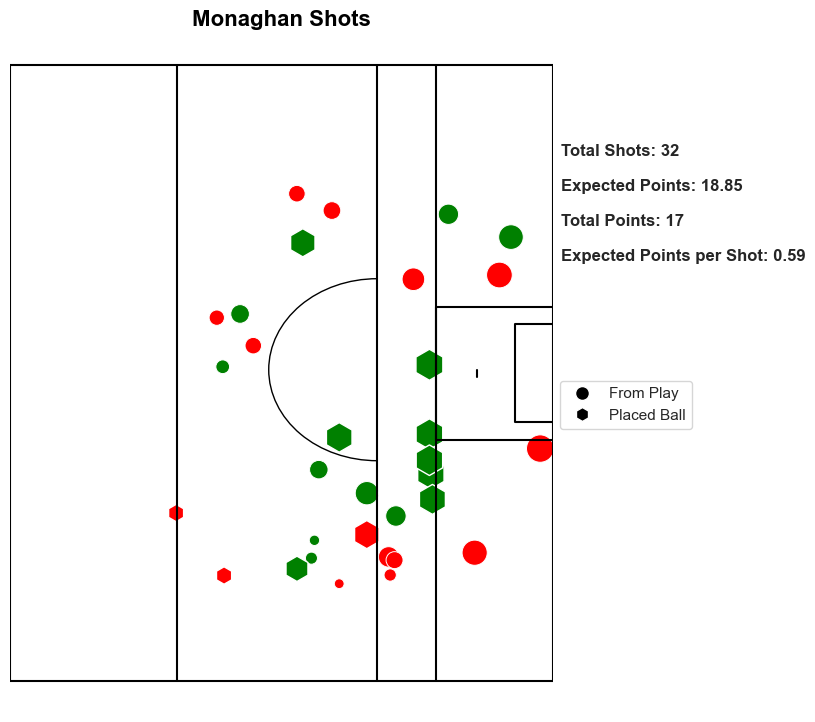

In [778]:
shot_map(t1)

In [779]:
t2 = df[df['TeamName'] == 'Meath']

In [780]:
t2

,Unnamed: 0.1,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv
1625,543,114,2024-06-16,All Ireland Group R3,Meath,Monaghan,1st,9,wide,Miss,Darragh Campion,6,back,right,y,39.43,105.660149,46.692269,105.660149,46.692269,0,0,1,1,0,-3.914999,0,0.274662
1626,544,116,2024-06-16,All Ireland Group R3,Meath,Monaghan,1st,10,point,Score,Cillian O'Sullivan,11,forward,hand,y,9.94,142.827849,34.295574,142.827849,34.295574,1,1,1,3,2,77.383386,0,0.800275
1628,546,118,2024-06-16,All Ireland Group R3,Meath,Monaghan,1st,13,free,Score,Mathew Costello,14,forward,left,n,31.29,129.915127,16.586011,129.915127,16.586011,1,0,0,3,1,61.177687,1,0.837184
1629,548,120,2024-06-16,All Ireland Group R3,Meath,Monaghan,1st,15,wide,Miss,Cathal Hickey,12,forward,left,y,16.52,129.566134,49.879990,129.566134,49.879990,0,1,1,3,1,-20.855827,0,0.743660
1631,550,122,2024-06-16,All Ireland Group R3,Meath,Monaghan,1st,17,point,Score,Mathew Costello,14,forward,left,n,38.79,107.754104,54.838668,107.754104,54.838668,1,1,0,3,1,-16.225155,0,0.497004
1633,552,124,2024-06-16,All Ireland Group R3,Meath,Monaghan,1st,20,blocked,Miss,Cillian O'Sullivan,11,forward,left,y,37.79,119.445352,71.839848,119.445352,71.839848,0,1,1,3,1,-47.450674,0,0.352102
1635,555,127,2024-06-16,All Ireland Group R3,Meath,Monaghan,1st,26,free,Score,Mathew Costello,14,forward,left,n,16.31,128.693653,44.212930,128.693653,44.212930,1,1,0,3,1,-0.748131,1,0.944827
1644,565,137,2024-06-16,All Ireland Group R3,Meath,Monaghan,2nd,41,point,Score,Eoghan Frayne,15,forward,right,n,34.29,25.915364,21.544689,119.084636,66.455311,1,0,0,3,0,-40.908485,0,0.634008
1648,569,141,2024-06-16,All Ireland Group R3,Meath,Monaghan,2nd,46,free,Score,Cillian O'Sullivan,11,forward,left,n,23.84,17.365048,60.328632,127.634952,27.671368,1,0,0,3,1,43.238140,1,0.906372
1653,574,147,2024-06-16,All Ireland Group R3,Meath,Monaghan,2nd,57,point,Score,Ronan Jones,8,midfielder,left,y,23.21,17.539545,28.805610,127.460455,59.194390,1,1,1,2,1,-40.902165,0,0.599295


In [781]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D

def shot_map(data):
    #shot_data = data[(data['Action'] == "point") | (data['Action'] == "free") | (data['Action'] == "fortyfive")
     #                | (data['Action'] == "blocked") | (data['Action'] == "fortyfive short") | (data['Action'] == "fortyfive wide") | (data['Action'] == "free short")
      #               | (data['Action'] == "free wide") | (data['Action'] == "goal") | (data['Action'] == "goal miss")
       #              | (data['Action'] == "offensive mark") | (data['Action'] == "penalty goal")
        #             | (data['Action'] == "post") | (data['Action'] == "short") | (data['Action'] == "wide")
         #           | (data['Action'] == "offensive mark wide") | (data['Action'] == "free post")]

    shot_data = data

    # Rest of the pitch lines...
    fig=plt.figure()
    fig.set_size_inches(7, 8.8)
    ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
    plt.plot([0,0],[0,88], color="black")
    plt.plot([0,145],[88,88], color="black")
    plt.plot([145,145],[88,0], color="black")
    plt.plot([145,0],[0,0], color="black")

    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")

            #goals#
    ly4 = [40.75,40.75,47.25,47.25]
    lx4 = [145,145.2,145.2,145]
    plt.plot(lx4,ly4,color="black")

    ly5 = [40.75,40.75,47.25,47.25]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="black")

           #6 yard boxes#
    ly6 = [37,37,51,51]
    lx6 = [145,140.5,140.5,145]
    plt.plot(lx6,ly6,color="black")

    ly7 = [37,37,51,51]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="black")
    
    ly88 = [34.5,34.5,53.5,53.5]
    lx88 = [145,131,131,145]
    plt.plot(lx88,ly88,color="black",zorder=5)

    ly87 = [34.5,34.5,53.5,53.5]
    lx87 = [0,14,14,0]
    plt.plot(lx87,ly87,color="black",zorder=5)
        
        #halfway small line
    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")
        
        #peno lines
    ly90 = [43.5,44.5] 
    lx90 = [11,11]
    plt.plot(lx90,ly90,color="black")
        
    ly89 = [43.5,44.5] 
    lx89 = [136,136]
    plt.plot(lx89,ly89,color="black")
        
        #14 yard line across the pitch
    ly94 = [0,88] 
    lx94 = [14,14]
    plt.plot(lx94,ly94,color="black")
        
    ly99 = [0,88] 
    lx99 = [131,131]
    plt.plot(lx99,ly99,color="black")
       
    #21 yard line
    ly98 = [0,88] 
    lx98 = [124,124]
    plt.plot(lx98,ly98,color="black")
        
    ly93 = [0,88] 
    lx93 = [21,21]
    plt.plot(lx93,ly93,color="black")
     
    #45 metre line
    ly96 = [0,88] 
    lx96 = [100,100]
    plt.plot(lx96,ly96,color="black")
        
    ly91 = [0,88] 
    lx91 = [45,45]
    plt.plot(lx91,ly91,color="black")
        
     #65 yard line
    ly95 = [0,88] 
    lx95 = [80,80]
    plt.plot(lx95,ly95,color="black")
        
    ly92 = [0,88] 
    lx92 = [65,65]
    plt.plot(lx92,ly92,color="black")
    
  #  ly921 = [124,30] 
   # lx921 = [0,30]
    #plt.plot(lx921,ly921,color="black")

#Prepare Arcs
    leftArc = Arc((21,44.5),height=26,width=26,angle=0,theta1=270,theta2=90,color="black")
    rightArc = Arc((124,44.5),height=26,width=26,angle=0,theta1=90,theta2=270,color="black")

#Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    # Prepare Arcs...
    
    plt.axis('off')

   # Separate shot data based on Placed_Ball
    placed_ball_data = shot_data[shot_data['Placed_Ball'] == 1]
    normal_data = shot_data[shot_data['Placed_Ball'] != 1]

    # Get the minimum and maximum xP_adv values from the combined data
    min_xp_adv = shot_data['xP_adv'].min()
    max_xp_adv = shot_data['xP_adv'].max()

    # Normalize the sizes based on the combined min and max xP_adv values
    norm = Normalize(vmin=min_xp_adv, vmax=max_xp_adv)

    # Plot scatter plot with circles for normal shots
    sns.scatterplot(
        data=normal_data,
        x='stand_x',
        y='stand_y',
        hue='Score',
        palette={0: 'red', 1: 'green'},
        size='xP_adv',
        sizes=(50, 500),
        ax=ax,
        legend=False,
        marker='o',
        size_norm=norm
    )

    # Plot scatter plot with hexagons for placed ball shots
    sns.scatterplot(
        data=placed_ball_data,
        x='stand_x',
        y='stand_y',
        hue='Score',
        palette={0: 'red', 1: 'green'},
        size='xP_adv',
        sizes=(50, 500),
        ax=ax,
        legend=False,
        marker='h',
        size_norm=norm
    )

    # Set limits for x-axis
    plt.xlim(80, 145)

    # Calculate total number of shots
    total_shots = len(shot_data)
    # Calculate total score
    total_score = shot_data['Score'].sum()
    # Calculate sum of xP_Adv
    total_xp_adv = shot_data['xP_adv'].sum()
    avg_xp_per_shot = total_xp_adv / total_shots  # Calculate average expected points per shot

    # Display total shots, total score, and sum of xP_Adv under the graph
    plt.text(146, 75, f'Total Shots: {total_shots}', fontsize=12, fontweight='bold')
    plt.text(146, 70, f'Expected Points: {total_xp_adv:.2f}', fontsize=12, fontweight='bold')
    plt.text(146, 65, f'Total Points: {total_score}', fontsize=12, fontweight='bold')
    plt.text(146, 60, f'Expected Points per Shot: {avg_xp_per_shot:.2f}', fontsize=12, fontweight='bold')
    
    #for _, row in data.iterrows():
     #   plt.text(row['stand_x'], row['stand_y'], f"{row['Score']:.2f}", fontsize=8, ha='right', color='blue')


    # Add legend for color
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Miss'),
                       Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Score')]
    ax.legend(handles=legend_elements, loc='best')

    # Add legend for shape and size
    legend_elements2 = [Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='From Play'),
                        Line2D([0], [0], marker='h', color='w', markerfacecolor='black', markersize=10, label='Placed Ball')]
    ax.legend(handles=legend_elements2, loc='best', bbox_to_anchor=(1, 0.5))

    ax.set_title('Meath Shots', fontsize=16, fontweight='bold', color='black')

    plt.savefig('Meath_Shots_v_Monaghan.png', dpi=300, bbox_inches='tight')

    plt.show()

/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_9019/1452667363.py:150: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(


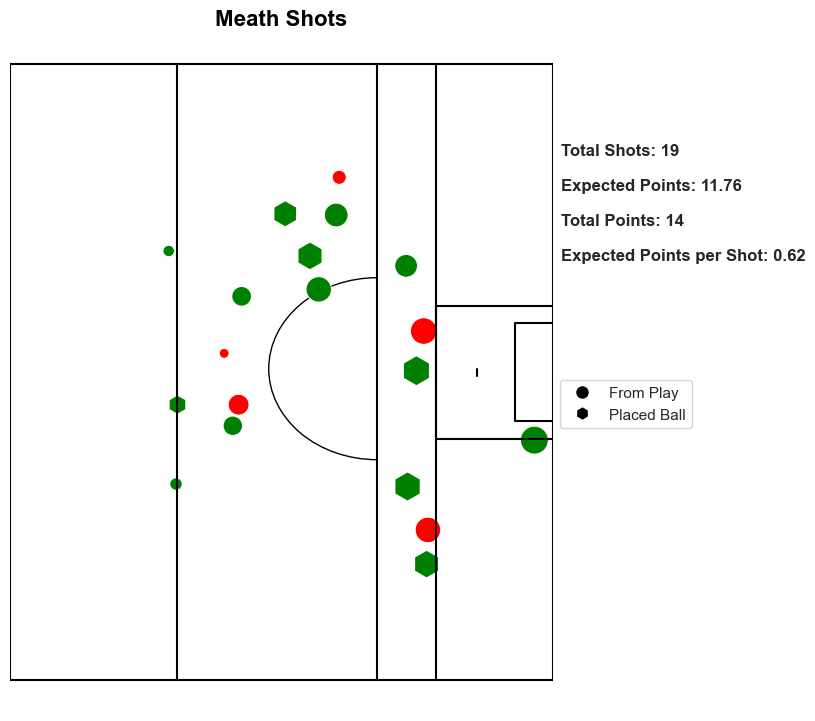

In [782]:
shot_map(t2)

## xP by minute

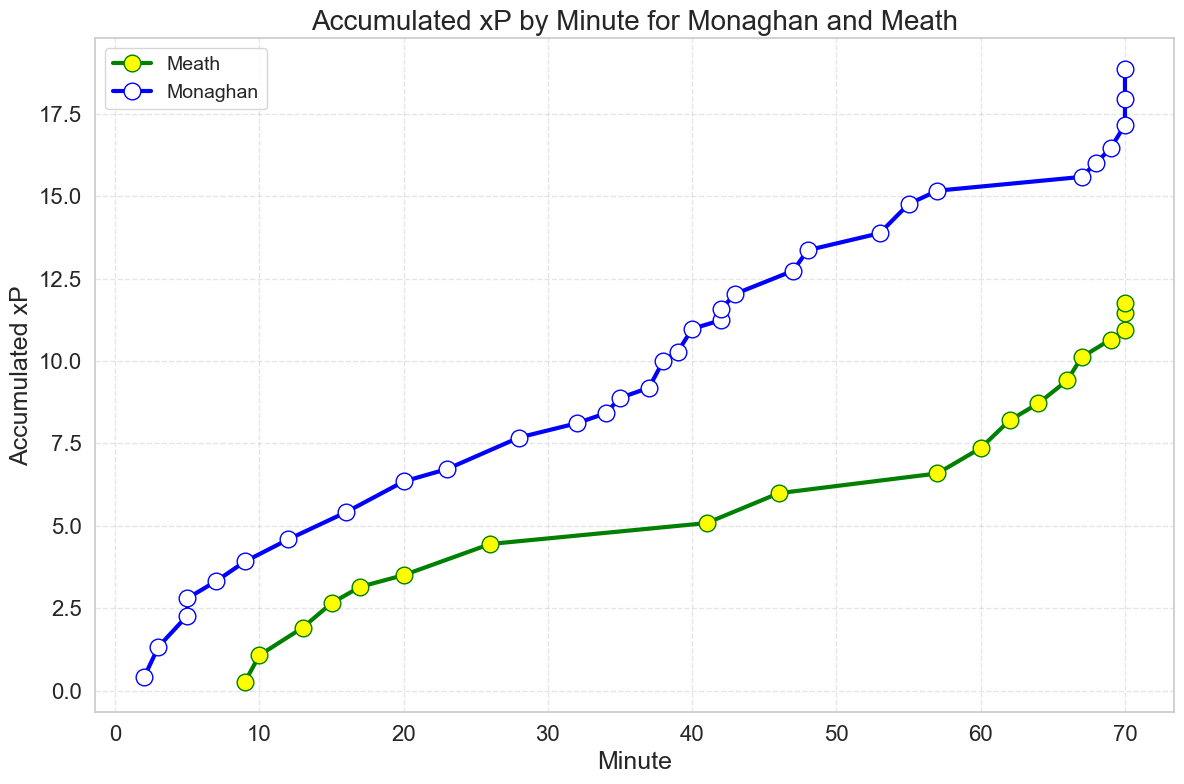

In [783]:
# Accumulate xP by minute for each team
df['cumulative_xP'] = df.groupby('TeamName')['xP_adv'].cumsum()

# Separate the data by team
Monaghan_data = df[df['TeamName'] == 'Monaghan']
Meath_data = df[df['TeamName'] == 'Meath']

# Plotting
#plt.style.use('dark_background')
plt.figure(figsize=(12, 8))

plt.plot(Meath_data['Minute'], Meath_data['cumulative_xP'], label='Meath', color='green', marker='o', markerfacecolor='yellow', markersize=12, linewidth=3)
plt.plot(Monaghan_data['Minute'], Monaghan_data['cumulative_xP'], label='Monaghan', color='blue', marker='o', markerfacecolor='white', markersize=12, linewidth=3)

plt.xlabel('Minute', fontsize=18)
plt.ylabel('Accumulated xP', fontsize=18)
plt.title('Accumulated xP by Minute for Monaghan and Meath', fontsize=20)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Additional style elements
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

plt.savefig('Accumulated_xP_Monaghan_Meath.png', dpi=300, bbox_inches='tight')

plt.show()


## Total xP per Team

In [784]:
df.groupby('TeamName').count()

,Unnamed: 0.1,Unnamed: 0,Date,Game,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,cumulative_xP
TeamName,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Meath,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
Monaghan,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32


In [811]:
tm = df.groupby('TeamName').count()

tm = tm[['Action']]
tm = tm.reset_index()
tm1 = df.groupby('TeamName').sum()
tm1

tm1 = tm1.reset_index()

tm1 = tm1[['TeamName', 'xP_adv', 'Score', 'Pressure_Value']]

tm2 = df.groupby('TeamName').mean()
tm2 = tm2.reset_index()
tm2 = tm2[['TeamName', 'Shot_Distance', 'Shot_Angle']]

merged_df = pd.merge(tm, tm1, on='TeamName')
merged_df = pd.merge(merged_df, tm2, on='TeamName')

md = merged_df.rename(columns={'Action': 'Shots'})

md = md[['TeamName', 'Shots', 'Score', 'xP_adv', 'Pressure_Value', 'Shot_Distance', 'Shot_Angle']]

# Calculate the numerical difference between md.Score and md.xPoints
md['Difference'] = md['Score'] - md['xP_adv']

# Sort the DataFrame by the 'Difference' column in descending order
md = md.sort_values(by='Difference', ascending=False)



md['xP per Shot'] = md['xP_adv'] / md['Shots']

md['% Shots w/ Pressure'] = md['Pressure_Value'] / md['Shots']

md.rename(columns={'TeamName': 'Team'}, inplace=True)
md.rename(columns={'Score': 'Points'}, inplace=True)
md.rename(columns={'xP_adv': 'xP'}, inplace=True)
md.rename(columns={'Shot_Distance': 'Avg. Shot Distance'}, inplace=True)
md.rename(columns={'Shot_Angle': 'Avg. Shot Angle'}, inplace=True)
md.rename(columns={'Difference': 'xP Difference'}, inplace=True)

md['xP'] = md['xP'].round(2)
md['xP Difference'] = md['xP Difference'].round(2)
md['xP per Shot'] = md['xP per Shot'].round(2)
md['% Shots w/ Pressure'] = md['% Shots w/ Pressure'].round(2)
md['% Shots w/ Pressure'] = md['% Shots w/ Pressure'] * 100
md['% Shots w/ Pressure'] = md['% Shots w/ Pressure'].apply(lambda x: f'{x:.0f}%')
md['Avg. Shot Distance'] = md['Avg. Shot Distance'].round(2)
md['Avg. Shot Angle'] = md['Avg. Shot Angle'].round(2)

md = md[['Team', 'Shots', 'Points', 'xP', 'xP Difference', 'xP per Shot', '% Shots w/ Pressure', 'Avg. Shot Distance']]

md = md.transpose()

md.columns = md.iloc[0]
md = md[1:]
md

Team,Meath,Monaghan
Shots,19,32
Points,14,17
xP,11.76,18.85
xP Difference,2.24,-1.85
xP per Shot,0.62,0.59
% Shots w/ Pressure,26%,47%
Avg. Shot Distance,32.66,30.72


In [812]:
md = md.reset_index()

In [813]:
md.rename(columns={'index': 'Stats'}, inplace=True)

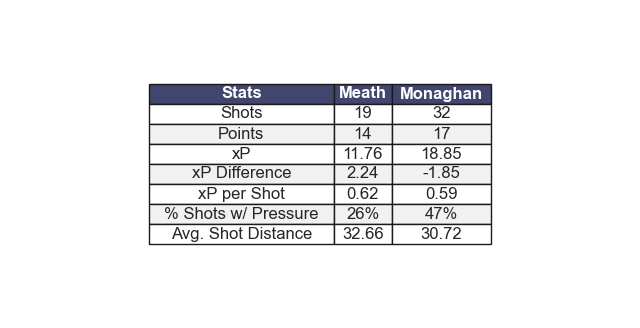

In [814]:
# Create a figure and axis

# Create a figure
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the size as needed

# Remove the x and y axis
ax.axis('off')

# Create the table
table_data = md.values
table_columns = md.columns
table = ax.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center')

# Adjust the table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(md.columns))))

# Style the table headers
for i in range(len(table_columns)):
    cell = table[(0, i)]
    cell.set_fontsize(14)
    cell.set_text_props(weight='bold', color='white')
    cell.set_facecolor('#40466e')

# Style the table rows
for i in range(1, len(md) + 1):
    for j in range(len(table_columns)):
        cell = table[(i, j)]
        if i % 2 == 0:
            cell.set_facecolor('#f1f1f2')
        else:
            cell.set_facecolor('white')

# Adjust cell borders
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

#plt.savefig('Game_Summary_Monaghan_Meath.png', dpi=300, bbox_inches='tight')

# Show the table
plt.show()

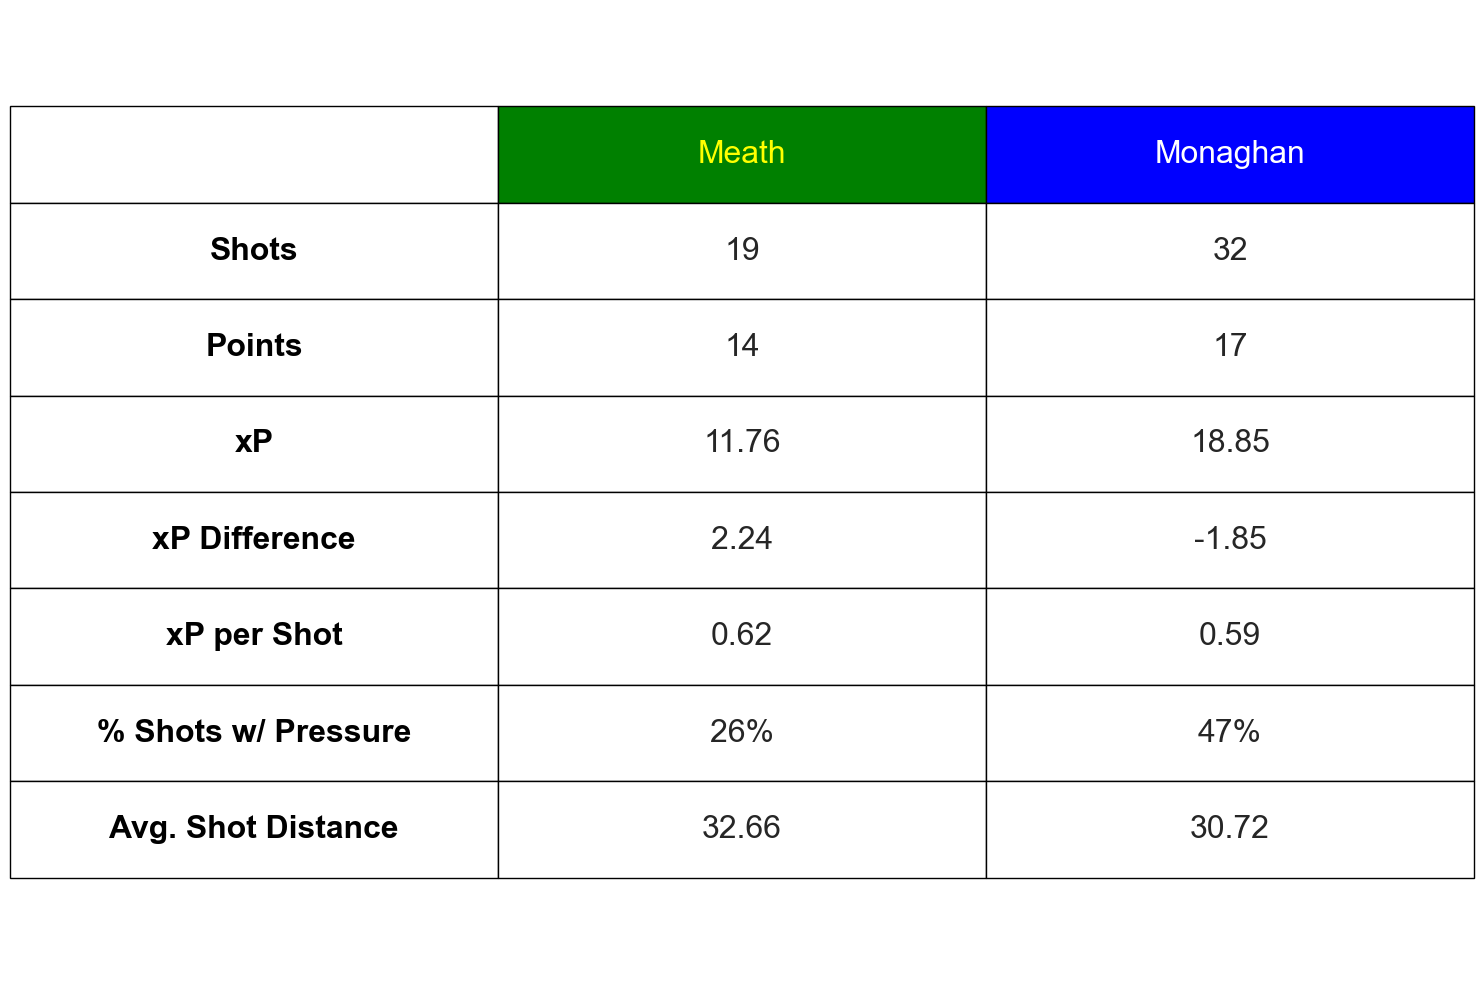

In [815]:


# Create a figure and an axis
fig, ax = plt.subplots(figsize=(15, 10)) 

# Hide axes
ax.axis('off')
ax.axis('tight')

# Create a table
table = ax.table(cellText=md.values,
                 colLabels=md.columns,
                 cellLoc='center',
                 loc='center')

# Apply styles
for (i, j), cell in table.get_celld().items():
    cell.set_edgecolor('black')
    cell.set_linewidth(1)
    cell.set_text_props(ha='center', va='center', fontsize=60)  # Increase font size
    cell.set_height(0.1)


    if i == 0:
        # Apply header styles
        if md.columns[j] == 'Meath':
            cell.set_facecolor('green')
            cell.get_text().set_color('yellow')
        elif md.columns[j] == 'Monaghan':
            cell.set_facecolor('blue')
            cell.get_text().set_color('white')
        elif md.columns[j] == 'Stats':
            cell.set_facecolor('white')
            cell.get_text().set_color('white')
            cell.get_text().set_weight('bold') 
    else:
        # Apply bold style to all cells in the 'index' column
        if j == md.columns.get_loc('Stats'):
            cell.get_text().set_weight('bold')
            cell.get_text().set_color('black')  # Ensure text color is set to visible
        else:
            # Set a default cell background color if needed
            cell.set_facecolor('white')
        

# Adjust layout
fig.tight_layout()

# Save the figure as an image
plt.savefig('Summary_Table_Monaghan_Meath.png', dpi=300, bbox_inches='tight')
plt.show()


## Total xP per Player

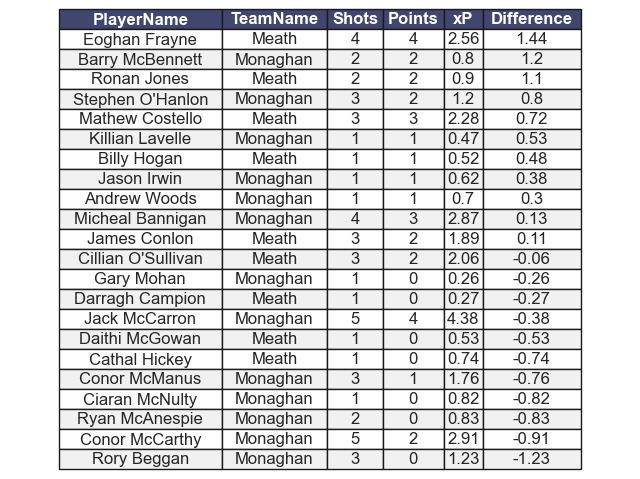

In [790]:
tm = df.groupby(['PlayerName', 'TeamName']).count()

tm = tm[['Action']]
tm = tm.reset_index()
tm

tm1 = df.groupby(['PlayerName', 'TeamName']).sum()

tm1 = tm1.reset_index()

tm1 = tm1[['PlayerName', 'TeamName', 'xP_adv', 'Score']]


merged_df = pd.merge(tm, tm1, on=['PlayerName', 'TeamName'])

md = merged_df.rename(columns={'Action': 'Shots'})
md = md.rename(columns={'xP_adv': 'xP'})
md = md.rename(columns={'Score': 'Points'})

md = md[['PlayerName', 'TeamName', 'Shots', 'Points', 'xP']]

# Calculate the numerical difference between md.Score and md.xPoints
md['Difference'] = md['Points'] - md['xP']

# Sort the DataFrame by the 'Difference' column in descending order
md = md.sort_values(by='Difference', ascending=False)


md['xP'] = md['xP'].round(2)
md['Difference'] = md['Difference'].round(2)



# Create a figure
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the size as needed

# Remove the x and y axis
ax.axis('off')

# Create the table
table_data = md.values
table_columns = md.columns
table = ax.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center')

# Adjust the table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(md.columns))))

# Style the table headers
for i in range(len(table_columns)):
    cell = table[(0, i)]
    cell.set_fontsize(14)
    cell.set_text_props(weight='bold', color='white')
    cell.set_facecolor('#40466e')

# Style the table rows
for i in range(1, len(md) + 1):
    for j in range(len(table_columns)):
        cell = table[(i, j)]
        if i % 2 == 0:
            cell.set_facecolor('#f1f1f2')
        else:
            cell.set_facecolor('white')

# Adjust cell borders
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.savefig('Individual_xP_Monaghan_Meath.png', dpi=300, bbox_inches='tight')

# Show the table
plt.show()


## Ranking xP

In [791]:
sorted_df = df.sort_values(by='xP_adv', ascending=True)

In [792]:
sorted_df

,Unnamed: 0.1,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,cumulative_xP
1645,566,138,2024-06-16,All Ireland Group R3,Monaghan,Meath,2nd,42,wide,Miss,Gary Mohan,8,midfielder,right,y,39.46,119.445352,13.929577,119.445352,13.929577,0,1,1,2,0,49.641229,0,0.264774,11.240174
1642,563,135,2024-06-16,All Ireland Group R3,Monaghan,Meath,2nd,39,point,Score,Barry McBennett,24,back,right,y,37.19,116.478916,20.127924,116.478916,20.127924,1,1,1,1,0,39.929248,0,0.273520,10.282174
1625,543,114,2024-06-16,All Ireland Group R3,Meath,Monaghan,1st,9,wide,Miss,Darragh Campion,6,back,right,y,39.43,105.660149,46.692269,105.660149,46.692269,0,0,1,1,0,-3.914999,0,0.274662,0.274662
1664,587,159,2024-06-16,All Ireland Group R3,Meath,Monaghan,2nd,70,point,Score,Ronan Jones,8,midfielder,right,n,49.14,45.982433,26.680462,99.017567,61.319538,1,0,0,2,0,-20.639161,0,0.301320,10.951099
1638,558,130,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,34,point,Score,Micheal Bannigan,11,forward,right,y,39.15,28.881800,70.423083,116.118200,17.576917,1,1,1,3,0,42.454449,0,0.303941,8.415170
1640,560,132,2024-06-16,All Ireland Group R3,Monaghan,Meath,2nd,37,wide,Miss,Ryan McAnespie,5,back,right,y,34.78,125.552721,15.169246,125.552721,15.169246,0,1,1,1,0,55.999057,0,0.308077,9.188345
1666,589,163,2024-06-16,All Ireland Group R3,Meath,Monaghan,2nd,70,point,Score,Eoghan Frayne,15,forward,right,n,47.85,45.109951,59.974441,99.890049,28.025559,1,1,0,3,0,19.500191,0,0.318251,11.760045
1646,567,139,2024-06-16,All Ireland Group R3,Monaghan,Meath,2nd,42,point,Score,Stephen O'Hanlon,10,forward,right,y,39.53,105.485652,44.921312,105.485652,44.921312,1,0,1,3,0,-1.335660,0,0.337924,11.578098
1633,552,124,2024-06-16,All Ireland Group R3,Meath,Monaghan,1st,20,blocked,Miss,Cillian O'Sullivan,11,forward,left,y,37.79,119.445352,71.839848,119.445352,71.839848,0,1,1,3,1,-47.450674,0,0.352102,3.504888
1634,554,126,2024-06-16,All Ireland Group R3,Monaghan,Meath,1st,23,short,Miss,Rory Beggan,1,goalkeeper,right,n,41.00,40.224056,36.066531,104.775944,51.933469,0,0,0,0,0,-11.157354,0,0.375229,6.721609
